# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_HDF-N_cat.fits')


In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J123810.904+620904.468,189.54543350513802,62.15124116971175,5.7817454,8.760616,3.0057983,6.698322,10.238506,3.4343445,4.3663144,7.7492247,1.507231,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,0.99857074,0.9988789,0.9988541,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123812.273+620941.311,189.551137576992,62.161475323145254,30.891922,33.53859,28.47527,22.131117,24.319736,19.659391,12.909231,15.269059,10.7291765,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,1.0005362,0.99862427,0.99996364,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123813.144+620837.606,189.554768296992,62.14377942314525,5.7760034,8.790065,3.000046,3.748936,7.1851606,1.3408954,1.7479699,4.217322,0.44767517,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,1.0008221,0.9984099,1.000787,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123813.251+620845.511,189.55521450513803,62.14597516971175,3.5076878,6.57895,1.2857193,4.9512787,8.289492,1.8982538,6.5456233,9.764269,3.229539,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,1.0001562,1.0004257,1.0018018,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123816.499+621202.092,189.56874650513802,62.200581169711754,1.1212893,2.6523256,0.27402833,1.3612535,3.1735928,0.37444246,0.9216756,2.2833858,0.26174304,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,0.99921834,0.99849784,1.0001457,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123816.824+621053.177,189.57009950513802,62.181438169711754,4.2401276,7.5272264,1.6174921,2.6455798,5.9771066,0.7887512,1.8843946,4.344066,0.5586216,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,0.99826556,1.0009078,1.0025522,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123816.844+621045.221,189.570183505138,62.17922816971175,15.701087,18.939682,12.236393,11.273182,14.831721,7.335961,5.3532224,8.467041,2.3614466,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,0.99991864,1.0012603,1.0005189,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123817.091+620956.419,189.571212906992,62.16567188314525,0.9954076,2.2324011,0.2891489,1.2974507,2.996817,0.34354034,1.6773067,3.4474993,0.52920526,-1.1852769,-2.0144193,-3.4563224,5.592549,6.124867,4.9960823,0.9984385,0.99950117,0.9999079,2000.0,2000.0,2000.0,1.0,1.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

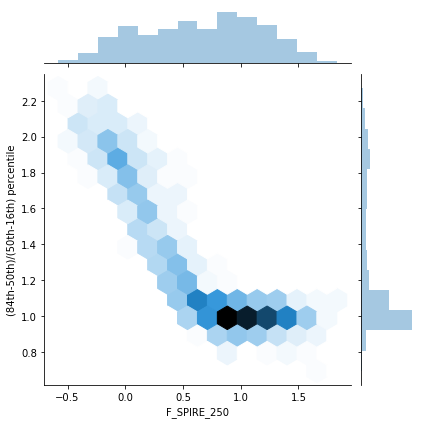

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

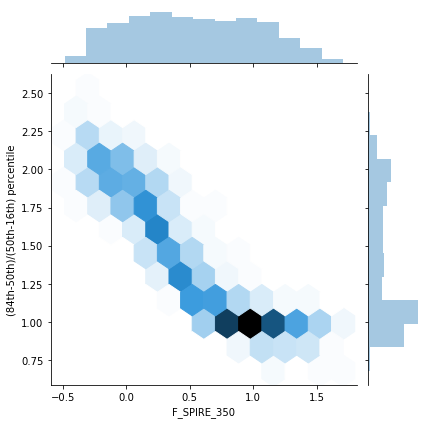

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

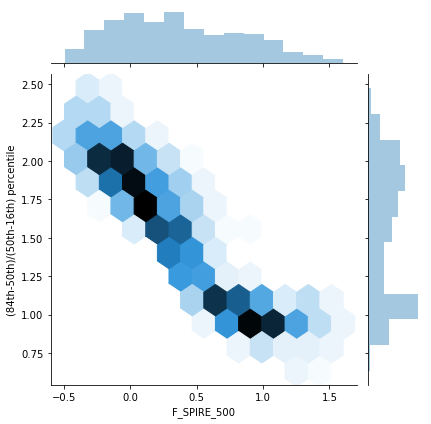

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

In [8]:
10**0.6

3.9810717055349722

## Add flag to catalogue

In [10]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [11]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 4)


In [12]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

834 834 834 834


In [13]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [14]:
cat.write('./data/dmu26_XID+SPIRE_HDF-N_cat_20191015.fits', format='fits',overwrite=True)


### Check Map

In [15]:
from astropy.io import fits
import pylab as plt

In [16]:
Pval=fits.open('./data/dmu26_XID+SPIRE_plw_HDF-N_Bayes_Pval.fits')


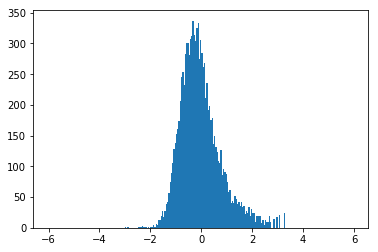

In [17]:
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

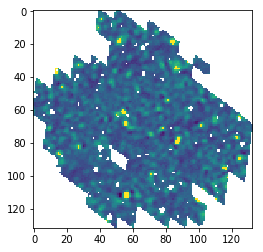

In [18]:
plt.imshow(Pval[1].data)